ANALISIS EXPLORATORIO DE LOS DATOS

Importo las librerias que voy a utlizar

In [391]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import cm


Importo el dataset de entrenamiento y comienzo a analizar los datos que contiene

In [392]:
data_train = pd.read_parquet("train.parquet")
data_train["price"] = np.where(data_train["price"]>999,0,1)

In [393]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int32  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [394]:
#La mayoria de los registros que tienen nulos en "laundry_options" son apartments
data_train["type"][data_train["laundry_options"].isnull()].value_counts()

apartment        60583
house             8302
condo              939
townhouse          826
duplex             247
manufactured       117
cottage/cabin       78
flat                33
loft                30
in-law              16
Name: type, dtype: int64

In [395]:
#La mayoria de los apartment tienen w/d in unit
data_train["laundry_options"][data_train["type"] == "apartment"].value_counts()

w/d in unit           96850
laundry on site       49646
w/d hookups           46539
laundry in bldg       30131
no laundry on site     2554
Name: laundry_options, dtype: int64

In [396]:
#Como la mayoria de los nulos en "laundry_options" son apartments voy a reemplazar los nulos con el valor mas comun de 
# "laundry_options" en apartments
data_train["laundry_options"].fillna("w/d in unit", inplace=True)


In [397]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int32  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [398]:
#La mayoria de los datos nulos en "parking_options" pertenecen al type apartment.
data_train["type"][data_train["parking_options"].isnull()].value_counts()

apartment        113419
house              8457
townhouse          2552
condo              1240
duplex              344
manufactured        321
cottage/cabin       179
loft                109
flat                 45
in-law               16
Name: type, dtype: int64

In [399]:
#La mayoria de los apartment tienen como "parking_options" el valor off-street parking,
data_train["parking_options"][data_train["type"] == "apartment"].value_counts()

off-street parking    97578
carport               30907
attached garage       18354
street parking        11723
detached garage       11457
no parking             2758
valet parking           107
Name: parking_options, dtype: int64

In [400]:
#Como la mayoria de los null en "parking_options" pertenecen al type apartment los voy a reemplazar con el valor
#más común de "parking_options" en apartments que es off-street parking
data_train["parking_options"].fillna("off-street parking", inplace= True)

In [401]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int32  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [402]:
#Reemplazo los dos valores nulos de "description" por "missing data" por solo ser 2.
data_train["description"].fillna("missing data", inplace = True)

In [403]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int32  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [404]:
#Como son relativamente pocos los nulos en la variables "lat" y "long" los voy a reemplazar con el mean 
data_train["lat"].fillna(np.mean(data_train["lat"]), inplace = True)
data_train["long"].fillna(np.mean(data_train["long"]), inplace = True)


In [405]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int32  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

Paso las variables que no son númericas a númericas para que el modelo funcione mejor.

In [406]:
encoder = preprocessing.LabelEncoder()
for column in data_train.columns:
    if data_train[column].dtype != ("int64" or "float"):
        data_train[column] = encoder.fit_transform(data_train[column])


In [407]:
data_train["price"].value_counts()

0    185825
1    160654
Name: price, dtype: int64

In [408]:
data_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,38528,33,38,0,6,1200,2,3,1,...,0,0,0,4,2,27836,180263,45464,5738,13
1,7043931179,76487,64,79,0,0,694,1,1,1,...,0,0,0,4,1,65486,245096,26613,8513,5
2,7048254516,217648,236,251,0,0,900,2,3,0,...,0,0,0,3,4,99029,59958,21077,43909,45
3,7041032577,242214,269,280,0,6,1469,3,3,1,...,0,0,0,4,4,99832,66192,11939,6568,3
4,7048588701,205786,230,240,1,0,700,1,1,1,...,0,0,0,4,1,16352,205044,19370,25218,42


In [409]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   id                       346479 non-null  int64
 1   url                      346479 non-null  int32
 2   region                   346479 non-null  int32
 3   region_url               346479 non-null  int32
 4   price                    346479 non-null  int64
 5   type                     346479 non-null  int32
 6   sqfeet                   346479 non-null  int64
 7   beds                     346479 non-null  int64
 8   baths                    346479 non-null  int64
 9   cats_allowed             346479 non-null  int64
 10  dogs_allowed             346479 non-null  int64
 11  smoking_allowed          346479 non-null  int64
 12  wheelchair_access        346479 non-null  int64
 13  electric_vehicle_charge  346479 non-null  int64
 14  comes_furnished          346479 non-

In [410]:
#Creo la columna target con el nombre de "y" y luego borro "price"
data_train["y"] = data_train["price"]

In [411]:
data_train.drop("price", axis = 1, inplace = True)

In [412]:
data_train.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,y
0,7048013474,38528,33,38,6,1200,2,3,1,1,...,0,0,4,2,27836,180263,45464,5738,13,0
1,7043931179,76487,64,79,0,694,1,1,1,1,...,0,0,4,1,65486,245096,26613,8513,5,0
2,7048254516,217648,236,251,0,900,2,3,0,0,...,0,0,3,4,99029,59958,21077,43909,45,0
3,7041032577,242214,269,280,6,1469,3,3,1,1,...,0,0,4,4,99832,66192,11939,6568,3,0
4,7048588701,205786,230,240,0,700,1,1,1,1,...,0,0,4,1,16352,205044,19370,25218,42,1


In [413]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   id                       346479 non-null  int64
 1   url                      346479 non-null  int32
 2   region                   346479 non-null  int32
 3   region_url               346479 non-null  int32
 4   type                     346479 non-null  int32
 5   sqfeet                   346479 non-null  int64
 6   beds                     346479 non-null  int64
 7   baths                    346479 non-null  int64
 8   cats_allowed             346479 non-null  int64
 9   dogs_allowed             346479 non-null  int64
 10  smoking_allowed          346479 non-null  int64
 11  wheelchair_access        346479 non-null  int64
 12  electric_vehicle_charge  346479 non-null  int64
 13  comes_furnished          346479 non-null  int64
 14  laundry_options          346479 non-

Visualizo las correlaciones en el mapa de calor para distinguir que variables son más útiles para que el modelo que elija tenga mejor rendimiento.

<AxesSubplot: >

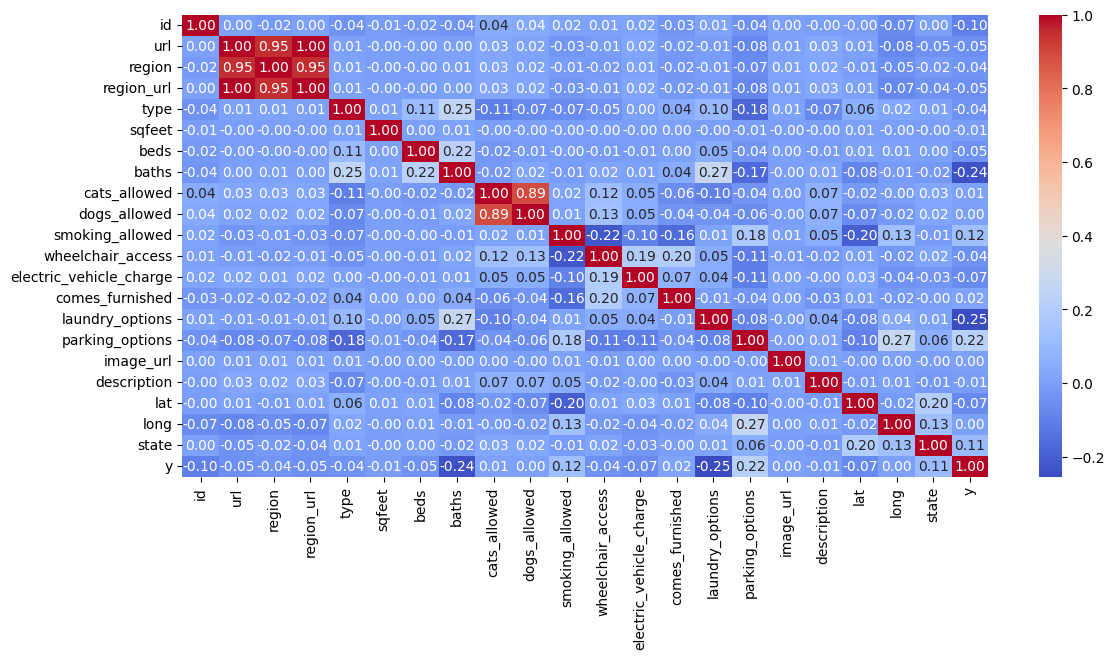

In [414]:
correlation = data_train.corr()
plt.figure(figsize = (13,6))
sns.heatmap(correlation, cbar = True, square = False, annot = True, fmt = '.2f', cmap = 'coolwarm')


Voy a tener en cuenta las variables que tengan correlación menor a -0.10 o mayor a 0.10

In [415]:
variables_importantes = data_train[["baths","smoking_allowed","laundry_options","parking_options","state"]]

PRUEBA DE DISTINTOS MODELOS

Importo las herramientas para evaluar el rendimiento de los modelos

In [416]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Comienzo probando el modelo LinearSVC

In [417]:
#Importo el modelo y train_test_split para partir la data
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#Planto una semilla
np.random.seed(42)

#Divido los datos en X (variables) e y (target)
X = variables_importantes
y = data_train["y"]

#Divido en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instancio y entreno el modelo
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf.predict(X_test)

#Compruebo la accuracy y recall del modelo (en el conjunto de pruebas)
print("Accuracy:", accuracy_score(y_test,y_test_pred))
print("Recall:", recall_score(y_test,y_test_pred))


Accuracy: 0.5941179866081736
Recall: 0.21622379365128813


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pruebo el modelo RandomForestClassifier

In [418]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = variables_importantes
y = data_train["y"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)


y_test_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test,y_test_pred))
print("Recall:", recall_score(y_test,y_test_pred))


Accuracy: 0.7997719926114062
Recall: 0.7704121366935609


PREDICCIÓN

Primero importo el dataset de testeo

In [419]:
data_test = pd.read_parquet("test.parquet")

Le realizo las mismas modificaciones que le realice al dataset de entrenamiento

In [420]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [421]:
#Como la mayoria de los nulos en "laundry_options" son apartments voy a reemplazar los nulos con el valor mas comun de 
# "laundry_options" en apartments
data_train["laundry_options"].fillna("w/d in unit", inplace=True)

In [422]:
#Como la mayoria de los null en "parking_options" pertenecen al type apartment los voy a reemplazar con el valor
#más común de "parking_options" en apartments que es off-street parking
data_test["parking_options"].fillna("off-street parking", inplace= True)

In [423]:
#Como son relativamente pocos los nulos en la variables "lat" y "long" los voy a reemplazar con el mean 
data_test["lat"].fillna(np.mean(data_test["lat"]), inplace = True)
data_test["long"].fillna(np.mean(data_test["long"]), inplace = True)

In [424]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

Paso las variables que no son númericas a númericas para que el modelo funcione mejor.

In [425]:
data_test = pd.read_parquet("test.parquet")

encoder = preprocessing.LabelEncoder()
for column in data_test.columns:
    if data_test[column].dtype != ("int64" or "float"):
        data_test[column] = encoder.fit_transform(data_test[column])

In [426]:
data_test.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,1478,9,11,8,1344,3,3,0,0,...,0,0,0,4,4,9913,18646,12126,9165,22
1,7032406876,36645,370,381,0,1050,2,1,0,0,...,0,0,0,3,4,9428,25330,13366,14018,46
2,7037022682,1328,9,11,0,1150,2,3,1,1,...,1,0,0,4,1,17803,18952,11757,9003,22
3,7048681802,11863,112,117,0,1280,2,4,1,1,...,0,0,0,4,0,9508,22532,9830,3137,5
4,7043597870,5858,53,59,0,783,2,1,1,1,...,0,0,0,1,7,5901,5436,7250,11873,45


In [427]:
variables_importantes = data_test[["baths","smoking_allowed","laundry_options","parking_options","state"]]
y = clf.predict(variables_importantes)
prediccion = pd.DataFrame(y.reshape(-1,1), columns = ["pred"])

In [428]:
prediccion.to_csv("FrancoGiovannone.csv", index = False)